# Algoritmos de agrupamiento

Los algoritmos pertenecientes a la familia de Aprendizaje No Supervisado **no tienen una variable para predecir ligada a los datos**.

En lugar de tener una salida, un objetivo, los datos solo tienen una entrada que serían múltiples variables que describen los datos.

Por ello se le llama también **aprendizaje no supervisado.**

El agrupamiento es la tarea de agrupar un conjunto de objetos de manera que los objetos en el mismo grupo sean más similares entre sí que con los objetos en otros grupos. La similitud es una métrica que refleja la fuerza de la relación entre dos objetos de datos. El agrupamiento se utiliza principalmente para la **minería de datos exploratoria**.

Tiene múltiples usos en muchos campos, como:
- el aprendizaje automático,
- el reconocimiento de patrones,
- el análisis de imágenes,
- la recuperación de información,
- la bioinformática,
- la compresión de datos,
- los gráficos por computadora.

# Carga de datos

In [178]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [179]:
import warnings
warnings.filterwarnings('ignore')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Renombramos los nombres de las columnas

In [181]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score',
                              'Genre': 'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Representación gráfica de las tres variables numéricas. La variable categórica "Gender" la representamos como color.

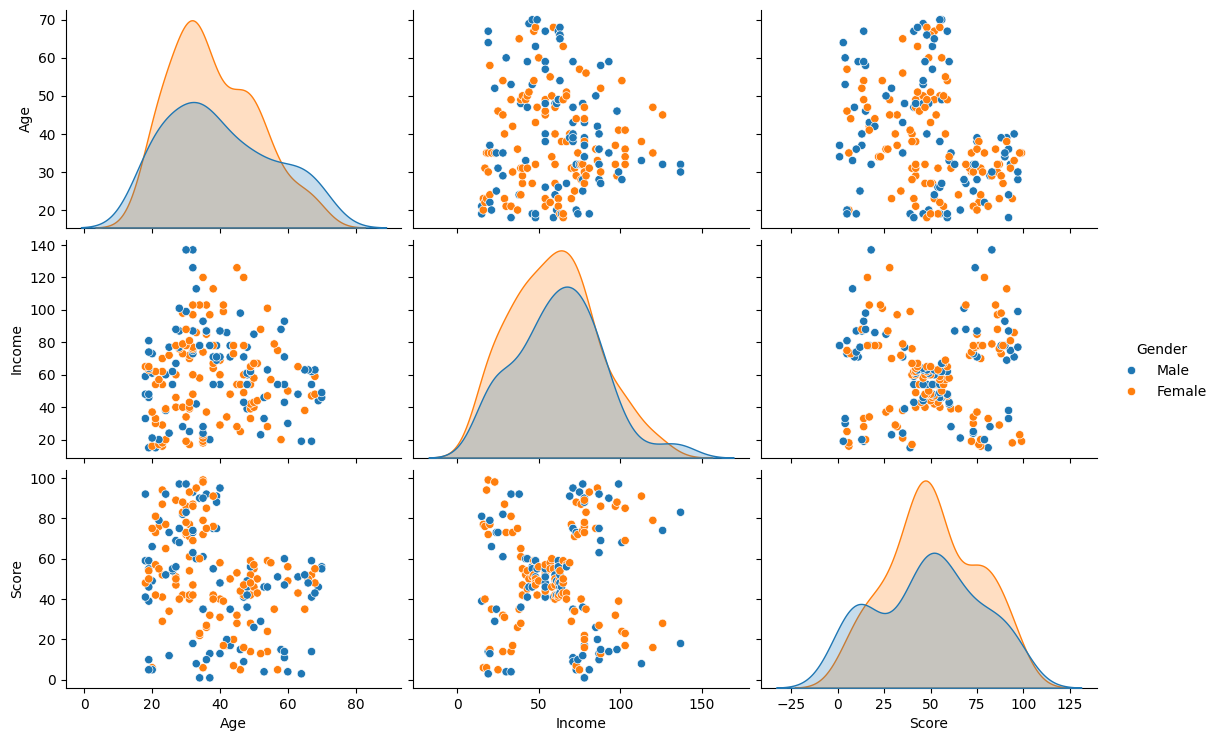

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

Del gráfico anterior vemos que el género no tiene una relación directa con la segmentación de clientes.

Es por eso que podemos eliminar esa variable.

Usaremos el parámetro X de ahora en adelante.

In [183]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [184]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     200 non-null    int64
 1   Income  200 non-null    int64
 2   Score   200 non-null    int64
dtypes: int64(3)
memory usage: 14.4+ KB


In [185]:
X_sin_normalizar = X.copy()
# Normalizamos X con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# KMeans

Existen muchos modelos para **clusterizar**. Repasaremos los más populares.

A pesar de su simplicidad, **K-means** se usa ampliamente para la agrupación en clústeres en muchas aplicaciones de ciencia de datos, especialmente útil si necesita descubrir rápidamente información de **datos sin etiquetar**.

Veremos cómo usar k-Means para la segmentación de clientes.

1. **Elección del número de clústeres (k)**: El primer paso siempre es elegir en cuantas agrupaciones queremos segmentar los datos.
2. **Inicializar las coordenadas de los centroides**: Los centroides se inicializan en coordenadas aleatorias.

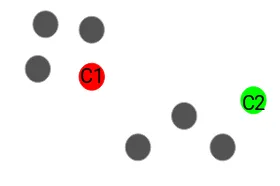

3. **Asignamos cada punto a un clúster**: Se calcula la distancia de cada punto a cada centroide, y se agrupa con aquel centroide más próximo.
4. **Se recalculan los centroides de los clústeres**: Una vez tenemos todos los puntos asignados a un clúster, se recalculan los centroides de manera que vuelven a ser los centros de cada clúster.

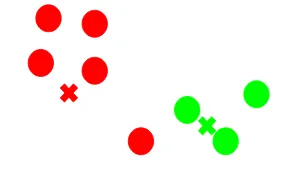

5. **Se repiten los pasos 3 y 4 hasta que se llega al criterio de parada**: El proceso de asignar cada punto a un clúster y calcular los centros se repite hasta que se cumple el criterio de parada estipulado.

El objetivo del algoritmo K-Means es minimizar la suma de las distancias entre los puntos y el centroide al que pertenecen.

## Método del codo para elegir el número de clusters

El método del codo (o regla del codo) es una técnica utilizada para determinar el número óptimo de clústeres (k) en el algoritmo K-Means.

Para determinar el número óptimo de clústeres (k), se utiliza el método del codo. Este método implica trazar la variación explicada en función del número de clústeres, y seleccionar el codo de la curva como el número de clústeres a usar. Un cambio brusco en la curva proporciona una indicación de que la variación adicional explicada no es significativa en comparación con el número de clústeres.

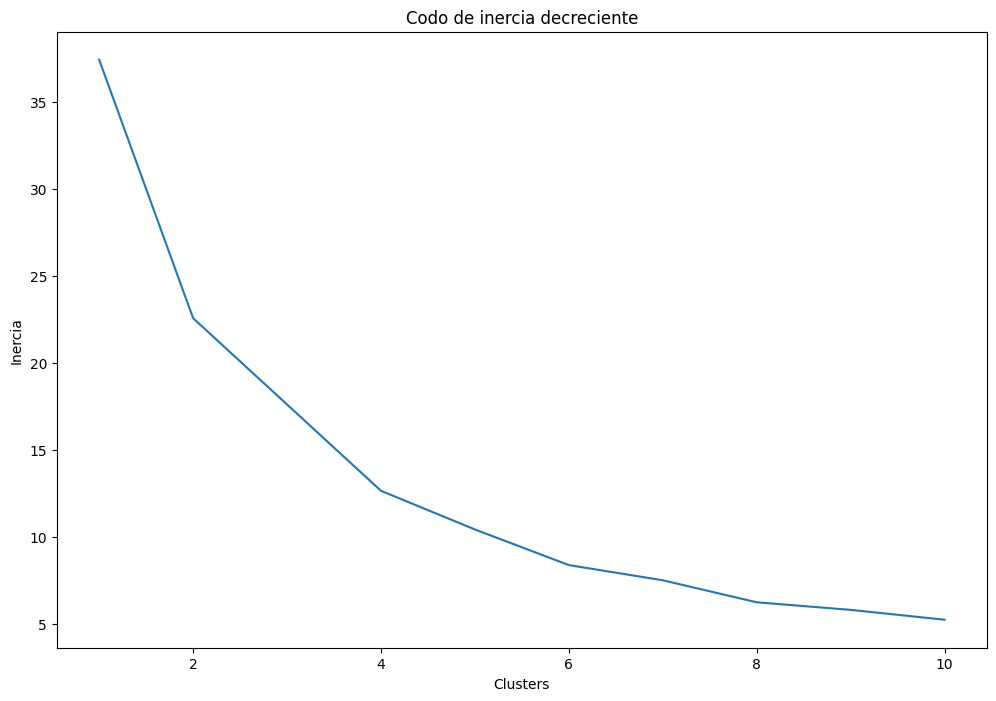

In [186]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Codo de inercia decreciente')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inercia')

# Annotate arrow
ax.annotate('Posible codo válido', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Posible codo válido', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

El método del codo nos dice que seleccionemos el grupo cuando hay un cambio significativo en la inercia. Como podemos ver en el gráfico, podemos decir que esto puede ser 3 o 5. Veamos ambos resultados en el gráfico y decidamos.

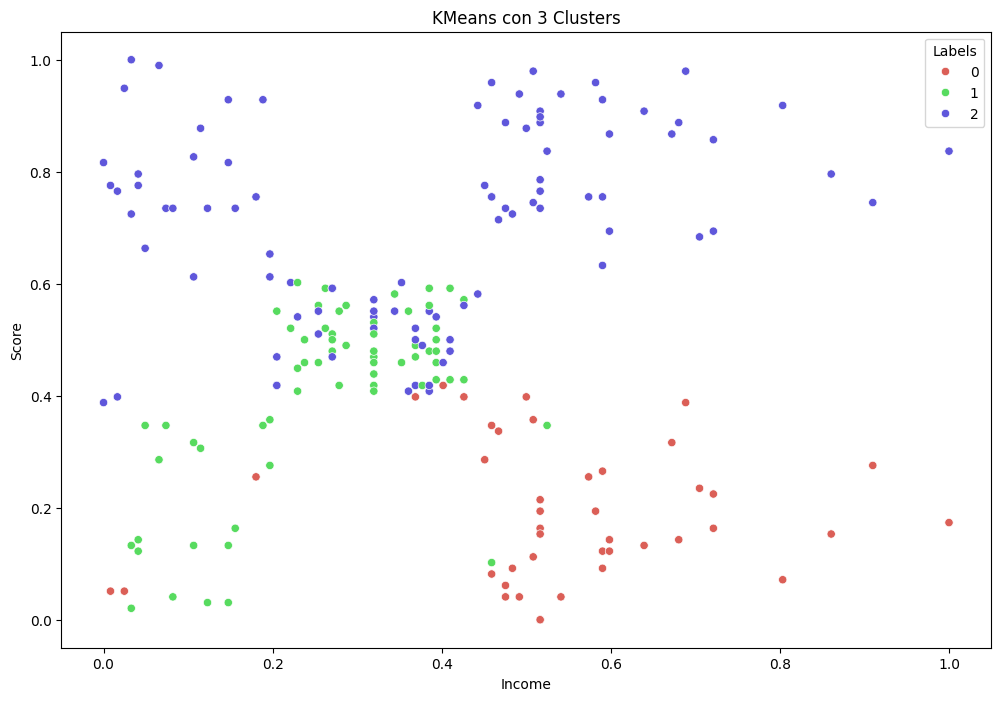

In [187]:
# Prueba con 3 clusters
clusters = 3
km3 = KMeans(n_clusters = clusters).fit(X)

# Las etiquetas atribuidas se colocan en la columna "Labels"
X_kmeans_3 = X.copy()
labels_3 = km3.labels_
X_kmeans_3['Labels'] = labels_3

# Gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_kmeans_3['Income'], y=X_kmeans_3['Score'], hue=X_kmeans_3['Labels'], palette=sns.color_palette('hls', clusters))
plt.title(f'KMeans con {clusters} Clusters')
plt.show()

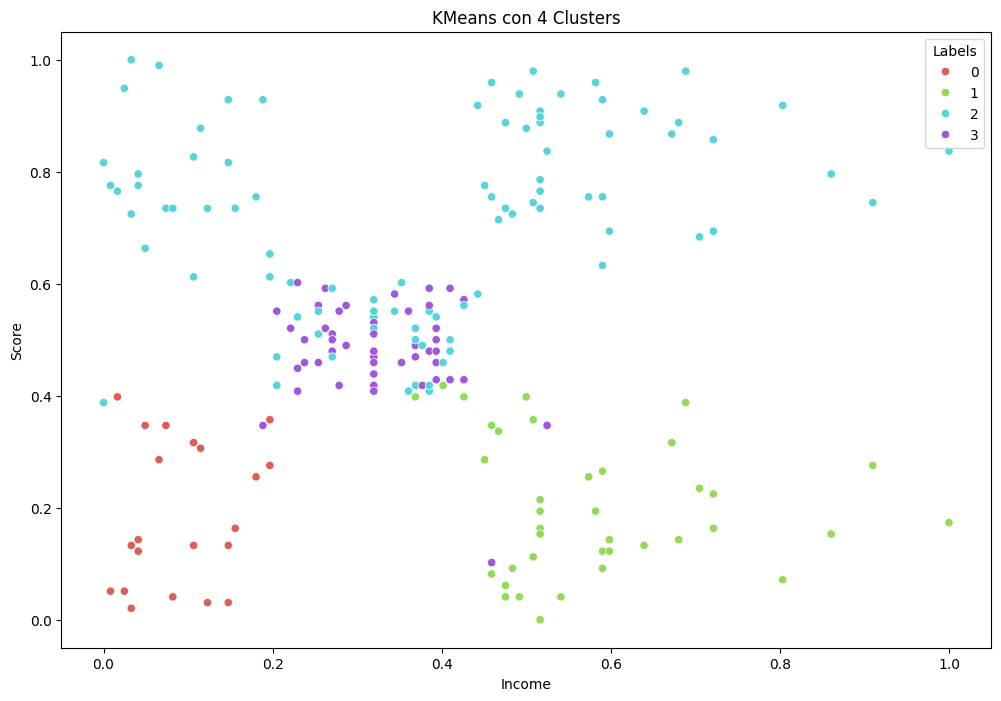

In [188]:
# Prueba con 4 clusters
clusters = 4
km3 = KMeans(n_clusters = clusters).fit(X)

# Las etiquetas atribuidas se colocan en la columna "Labels"
X_kmeans_4 = X.copy()
labels_4 = km3.labels_
X_kmeans_4['Labels'] = labels_4

# Gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_kmeans_4['Income'], y=X_kmeans_4['Score'], hue=X_kmeans_4['Labels'], palette=sns.color_palette('hls', clusters))
plt.title(f'KMeans con {clusters} Clusters')
plt.show()

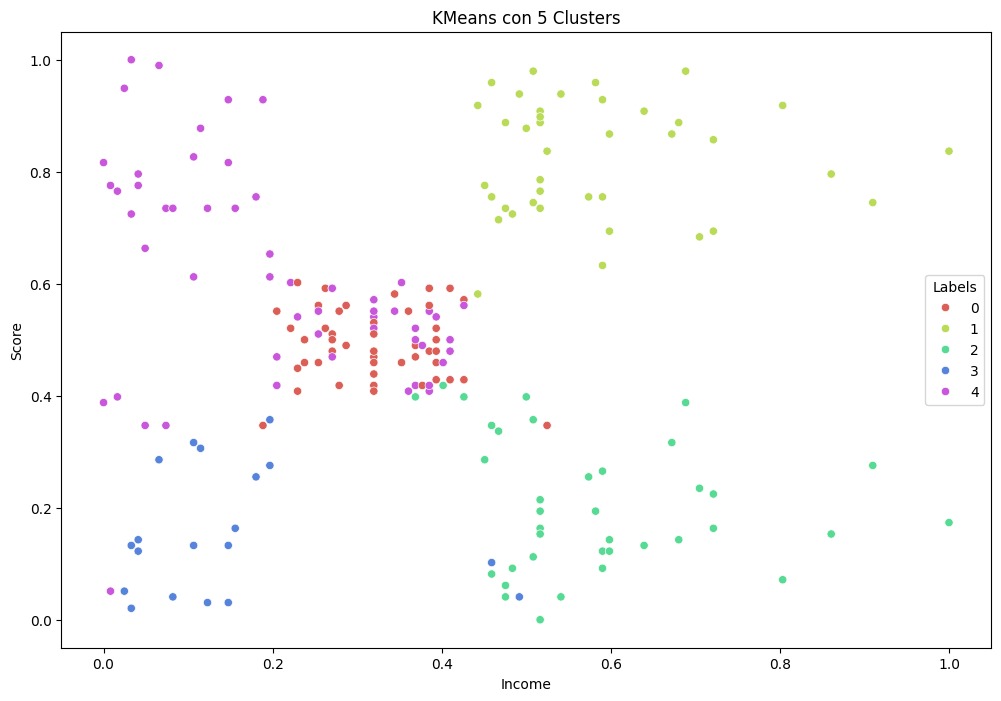

In [189]:
# Prueba con 5 clusters
clusters = 5
km5 = KMeans(n_clusters = clusters).fit(X)

# Las etiquetas atribuidas se colocan en la columna "Labels"
X_kmeans_5 = X.copy()
labels_5 = km5.labels_
X_kmeans_5['Labels'] = labels_5

# Gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_kmeans_5['Income'], y=X_kmeans_5['Score'], hue=X_kmeans_5['Labels'], palette=sns.color_palette('hls', clusters))
plt.title(f'KMeans con {clusters} Clusters')
plt.show()

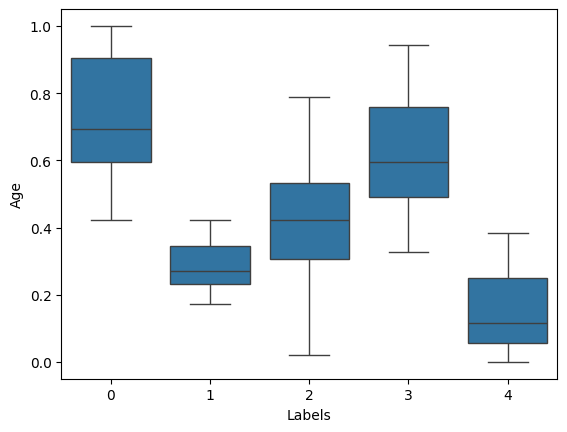

In [190]:
#Boxplot del dataset X por cada valor de la columna Labels y edad
# sns.boxplot(x='Labels', y='Age', data=X_kmeans_3)
# sns.boxplot(x='Labels', y='Age', data=X_kmeans_4)
sns.boxplot(x='Labels', y='Age', data=X_kmeans_5)
plt.show()

A juzgar por los gráficos, podríamos decir que 5 grupos parecen mejores que 3. Como este es un problema no supervisado, no podemos saber con certeza cuál es el mejor en la vida real, pero al observar los datos, es seguro decir que 5 sería nuestra elección.

Podemos analizar nuestros 5 clústeres en detalle ahora:

- `Etiqueta 0` es alto ingreso y alto gasto
- `Etiqueta 1` es ingreso bajo y gasto bajo
- `Etiqueta 2` es ingreso medio y gasto medio
- `Etiqueta 3` es ingreso alto y gasto bajo
- `Etiqueta 4` es ingreso bajo y gasto alto

También vamos a verlos más claramente con swarmplot:

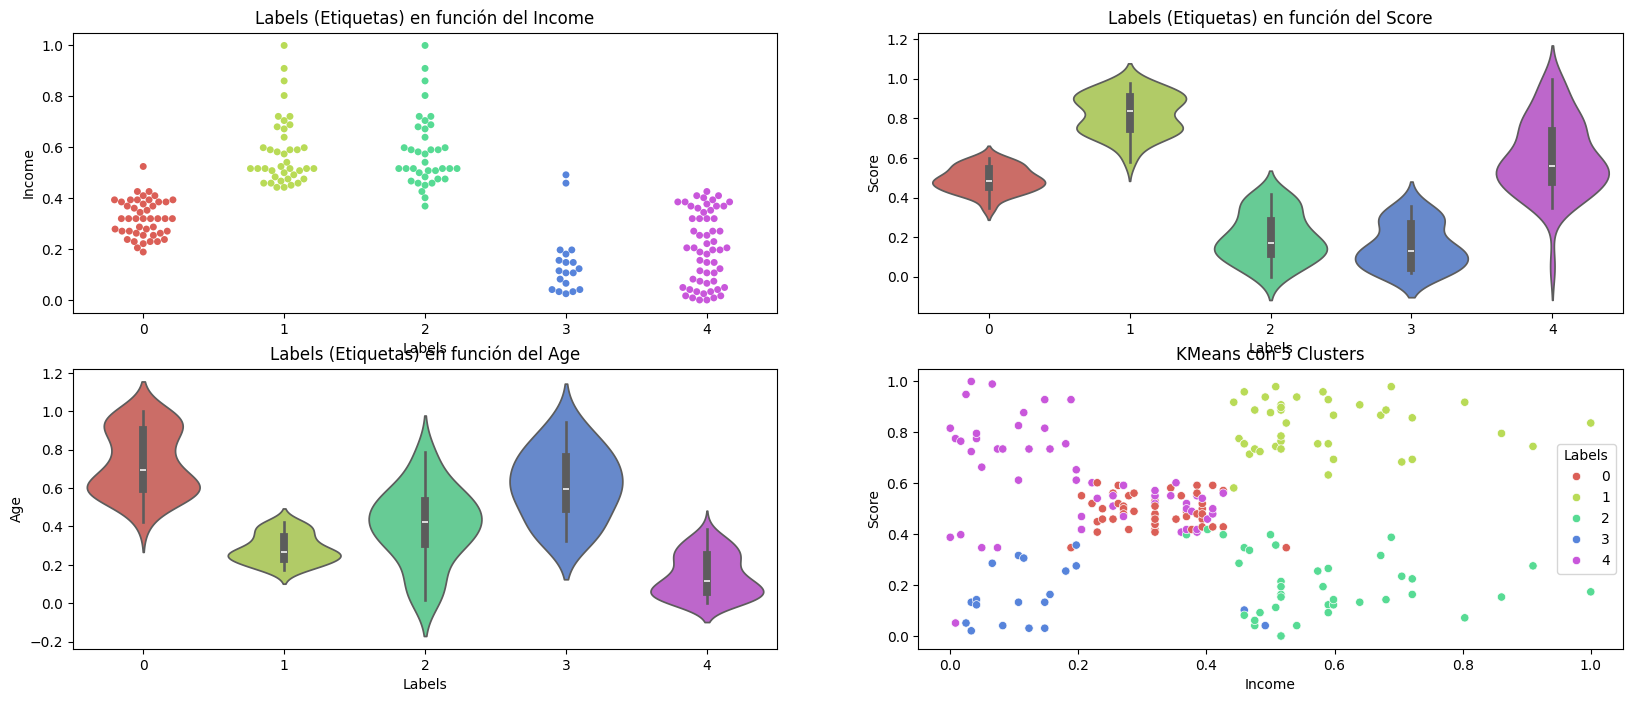

In [191]:
def grafica_conjunta(X_labels, num_clusteres):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(221)
    sns.swarmplot(x='Labels', y='Income', data=X_labels, ax=ax, palette=sns.color_palette('hls', 5))
    ax.set_title('Labels (Etiquetas) en función del Income')

    ax = fig.add_subplot(222)
    sns.violinplot(x='Labels', y='Score', data=X_labels, ax=ax, palette=sns.color_palette('hls', 5))
    ax.set_title('Labels (Etiquetas) en función del Score')

    ax = fig.add_subplot(223)
    sns.violinplot(x='Labels', y='Age', data=X_labels, ax=ax, palette=sns.color_palette('hls', 5))
    ax.set_title('Labels (Etiquetas) en función del Age')

    # Gráfico
    ax = fig.add_subplot(224)
    sns.scatterplot(x=X_labels['Income'], y=X_labels['Score'], hue=X_labels['Labels'], palette=sns.color_palette('hls', num_clusteres))
    ax.set_title(f'KMeans con {num_clusteres} Clusters')

    plt.show()

grafica_conjunta(X_kmeans_5, num_clusteres=5)

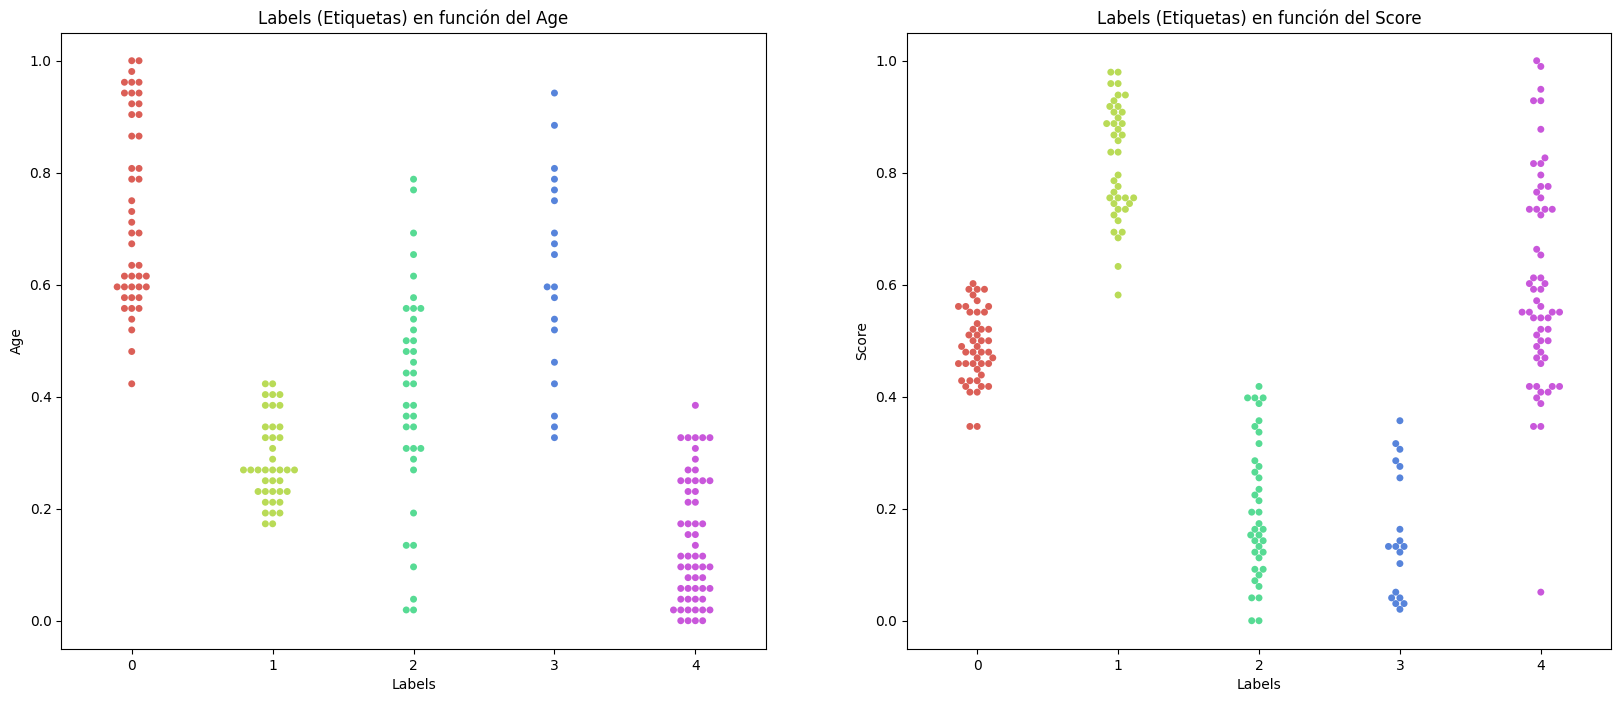

In [192]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Age', data=X_kmeans_5, ax=ax, palette=sns.color_palette('hls', 5))
ax.set_title('Labels (Etiquetas) en función del Age')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X_kmeans_5, ax=ax, palette=sns.color_palette('hls', 5))
ax.set_title('Labels (Etiquetas) en función del Score')

plt.show()

## Métricas de evaluación de la clusterización

In [193]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [194]:
# Silhouette Score (entre -1 y 1, cuanto más alto mejor)
# El óptimo es 4
silhouette = silhouette_score(X, labels_4)

# Calinski-Harabasz Index (cuanto más alto mejor)
# El óptimo es 5
calinski = calinski_harabasz_score(X, labels_5)

# Davies-Bouldin Score (cuanto más bajo mejor)
# El óptimo es 3
davies = davies_bouldin_score(X, labels_5)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.4f}")
print(f"Davies-Bouldin Score: {davies:.4f}")

Silhouette Score: 0.3675
Calinski-Harabasz Index: 123.7243
Davies-Bouldin Score: 0.9523



### ✅ Función evaluate_kmeans_metrics

In [195]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_kmeans_metrics(X, k_range=range(2, 10), random_state=42):
    """
    Evalúa KMeans para un rango de k y devuelve un DataFrame con tres métricas internas.

    Parámetros:
    -----------
    X : array-like o DataFrame
        Datos numéricos sin etiquetas.
    k_range : iterable
        Rango de valores de k (n_clusters) a evaluar.
    random_state : int
        Semilla para reproducibilidad.

    Retorna:
    --------
    metrics_df : DataFrame
        DataFrame con índices como valores de k, y columnas:
        ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
    """
    results = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        labels = kmeans.fit_predict(X)

        sil = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        davies = davies_bouldin_score(X, labels)

        results.append({
            'k': k,
            'Silhouette': sil,
            'Calinski-Harabasz': calinski,
            'Davies-Bouldin': davies
        })

    metrics_df = pd.DataFrame(results).set_index('k')
    return metrics_df


In [196]:
# Supón que ya tienes X definido (sin la columna 'Labels')
metrics = evaluate_kmeans_metrics(X, k_range=range(3, 15))
print(metrics)

    Silhouette  Calinski-Harabasz  Davies-Bouldin
k                                                
3     0.340279         111.301690        1.190556
4     0.365864          98.893690        0.991484
5     0.404210         125.931039        0.938728
6     0.419179         133.638294        0.848651
7     0.420766         125.820901        0.852543
8     0.367450         118.407805        0.993552
9     0.362913         113.871816        0.955571
10    0.366104         122.464769        0.938314
11    0.373277         130.038240        0.965774
12    0.366558         124.678246        0.949508
13    0.372872         129.342163        0.936646
14    0.373595         126.789110        0.920411


Utilizando estas métricas puedo ver que el agrupamiento en cinco clusteres no era el óptimo.

- Silhouette alcanza el máximo con 7 clusteres.
- Calinski-Harabasz alcanza el máximo con 6 clústeres.
- Davies-Bouldin alcanza el mínimo con 6 clústeres.

## Clustering Jerárquico

Veremos una técnica de agrupación, que es <b>agrupación jerárquica aglomerativa</b>.

La agrupación Aglomerativa es un enfoque de abajo hacia arriba en la forma de agrupar los elementos y es más popular que el agrupamiento divisivo (de arriba a abajo). <br> <br>

También utilizaremos la vinculación completa (Complete Linkage) como criterio de vinculación.<br>

La clase <b> AgglomerativeClustering </b> de la librería scikit-learn requerirá dos entradas:
<ul>
     <li> <b>n_clusters</b>: el número de clústeres a formar, así como el número de centroides a generar. </li>
     <li> <b>linkage</b>: qué criterio de enlace utilizar. El criterio de vinculación determina qué distancia utilizar entre conjuntos de observaciones. El algoritmo fusionará los pares de clústeres que minimizan este criterio. </li>
     <ul>
         <li> El valor será: 'complete' </li>
         <li> <b>Nota</b>: Se recomienda probar con el valor 'average' (promedio) también </li>
     </ul>
</ul>

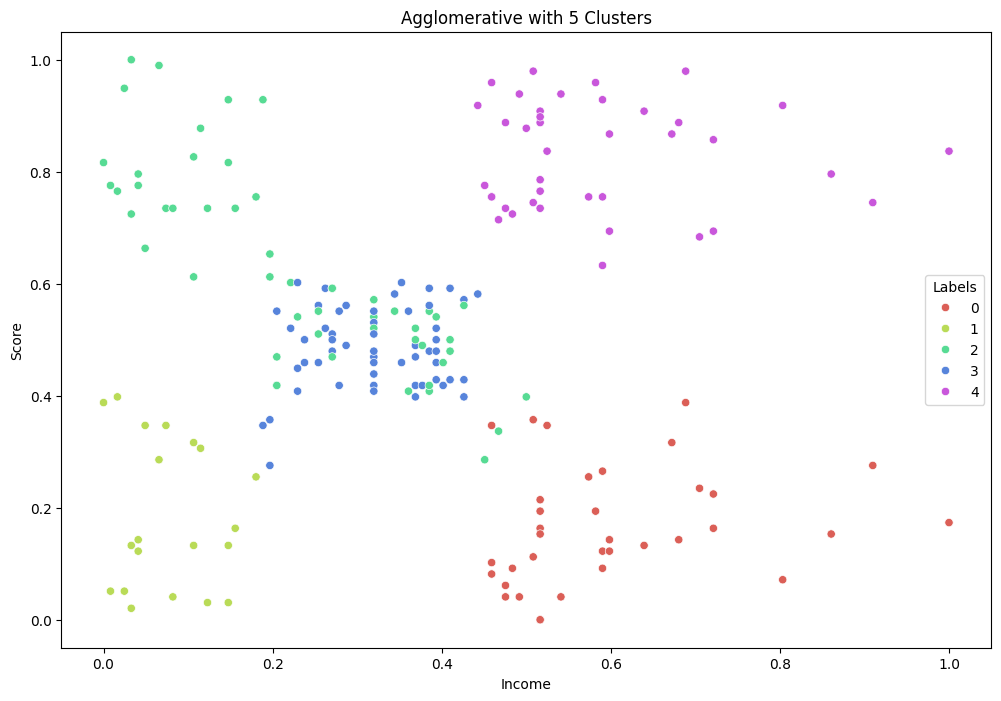

In [197]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X_aglomerativo = X.copy()
X_aglomerativo['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X_aglomerativo['Income'], y = X_aglomerativo['Score'], hue=X_aglomerativo['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

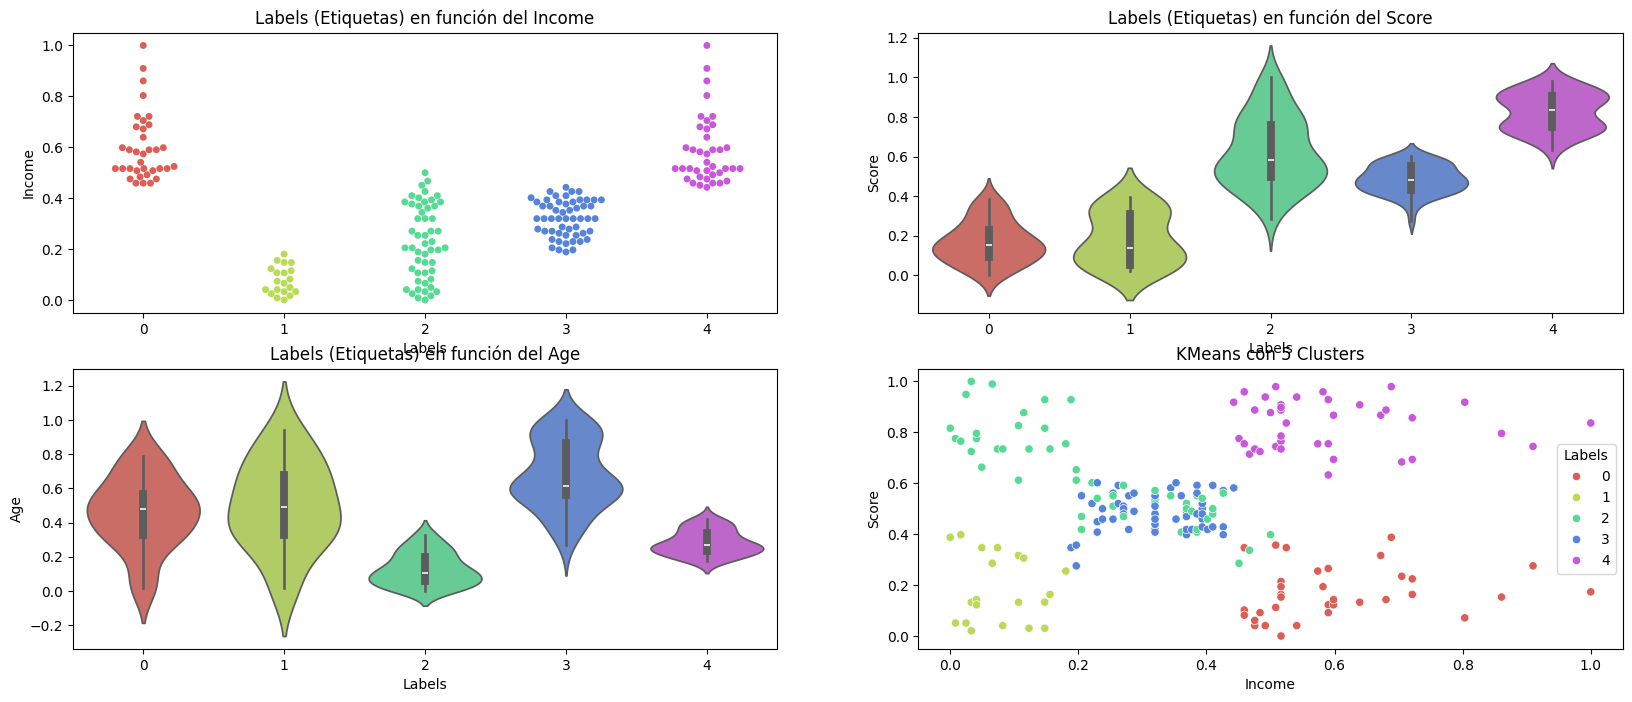

In [198]:
grafica_conjunta(X_aglomerativo, num_clusteres=5)

### Dendrograma asociado para el agrupamiento jerárquico aglomerativo

Una <b>matriz de distancia</b> contiene la <b> distancia de cada punto a cualquier otro punto de un conjunto de datos </b>. <br>

Podemos usar la función <b> distance_matrix, </b> que requiere <b>dos entradas</b>.

Los valores de distancia son simétricos, con una diagonal de 0's. Esta es una forma de asegurarse de que la matriz es correcta. <br>

In [199]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist

distancias_matriz = distance_matrix(X, X)
print(distancias_matriz)
print(distancias_matriz.shape)
distancias_vector = pdist(X)
print(distancias_vector)
print(len(distancias_vector))

[[0.         0.43029381 0.33738296 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         0.76559158 ... 0.93683095 1.20748243 1.01507247]
 [0.33738296 0.76559158 0.         ... 1.16089362 1.02563246 1.27984489]
 ...
 [1.00888686 0.93683095 1.16089362 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.02563246 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.27984489 ... 0.13432353 0.66437953 0.        ]]
(200, 200)
[0.43029381 0.33738296 0.39539647 ... 0.57849818 0.13432353 0.66437953]
19900


Utilizando la clase <b> linkage </b> de la jerarquía, pase los parámetros:
<ul>
     <li> La matriz de distancia </li>
     <li> 'complete' para enlace completo </li>
</ul>

In [200]:
Z = hierarchy.linkage(distancias_vector, 'complete')

Un agrupamiento jerárquico generalmente se visualiza como un dendrograma, como se muestra en la siguiente celda. Cada combinación está representada por una línea horizontal. La coordenada y de la línea horizontal es la similitud de los dos grupos que se fusionaron, donde las uniones se ven como grupos únicos.

Al pasar de la capa inferior al nodo superior, un dendrograma nos permite reconstruir el historial de fusiones que dieron como resultado el agrupamiento representado.

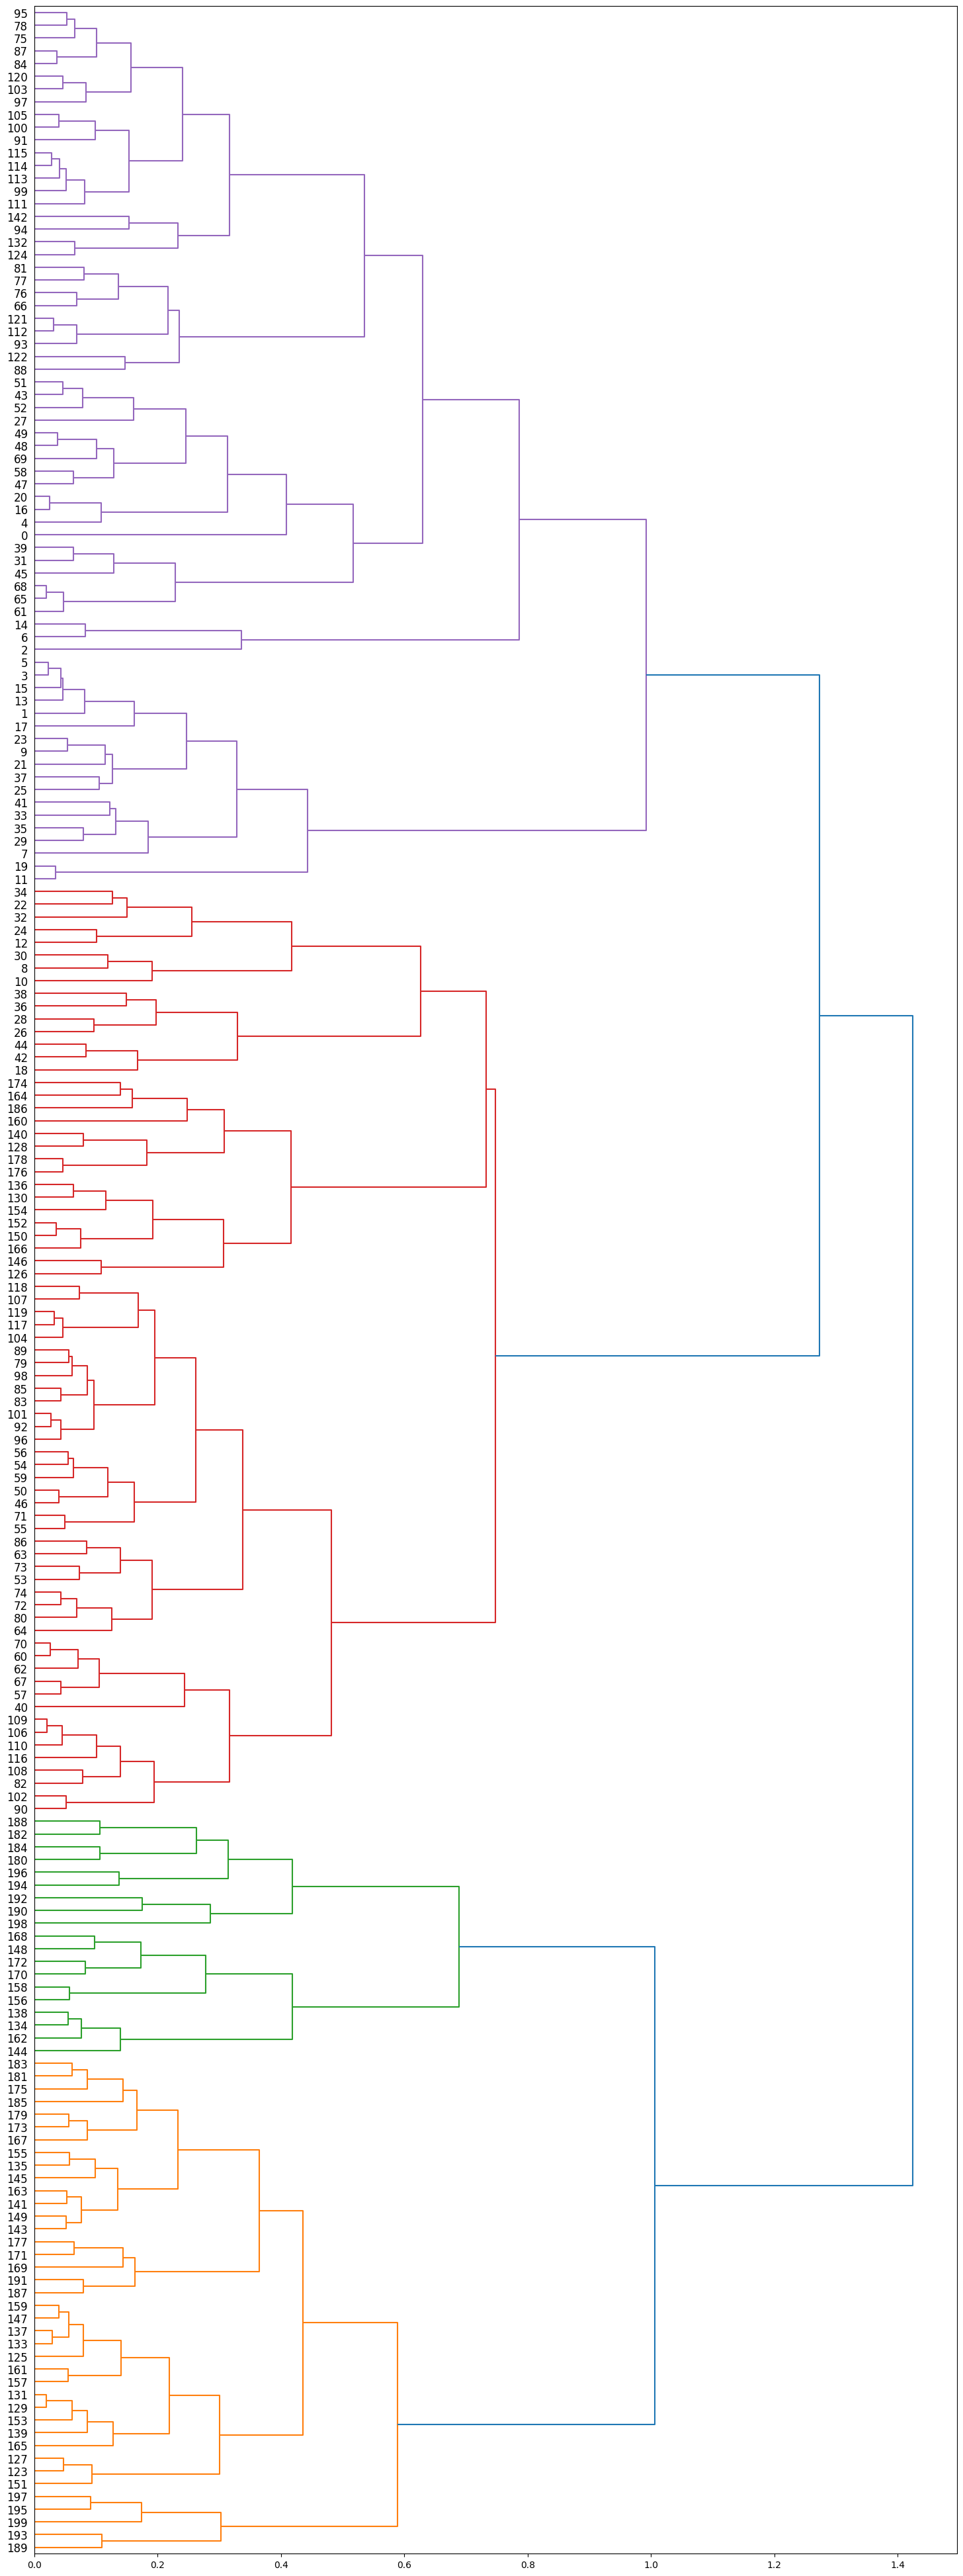

In [201]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [202]:
X.iloc[[156,158],:]

,Age,Income,Score
156,0.365385,0.516393,0.0
158,0.307692,0.516393,0.0


Si en lugar de usar el enlazado "completo" hubiéramos usado el "average" (promedio):

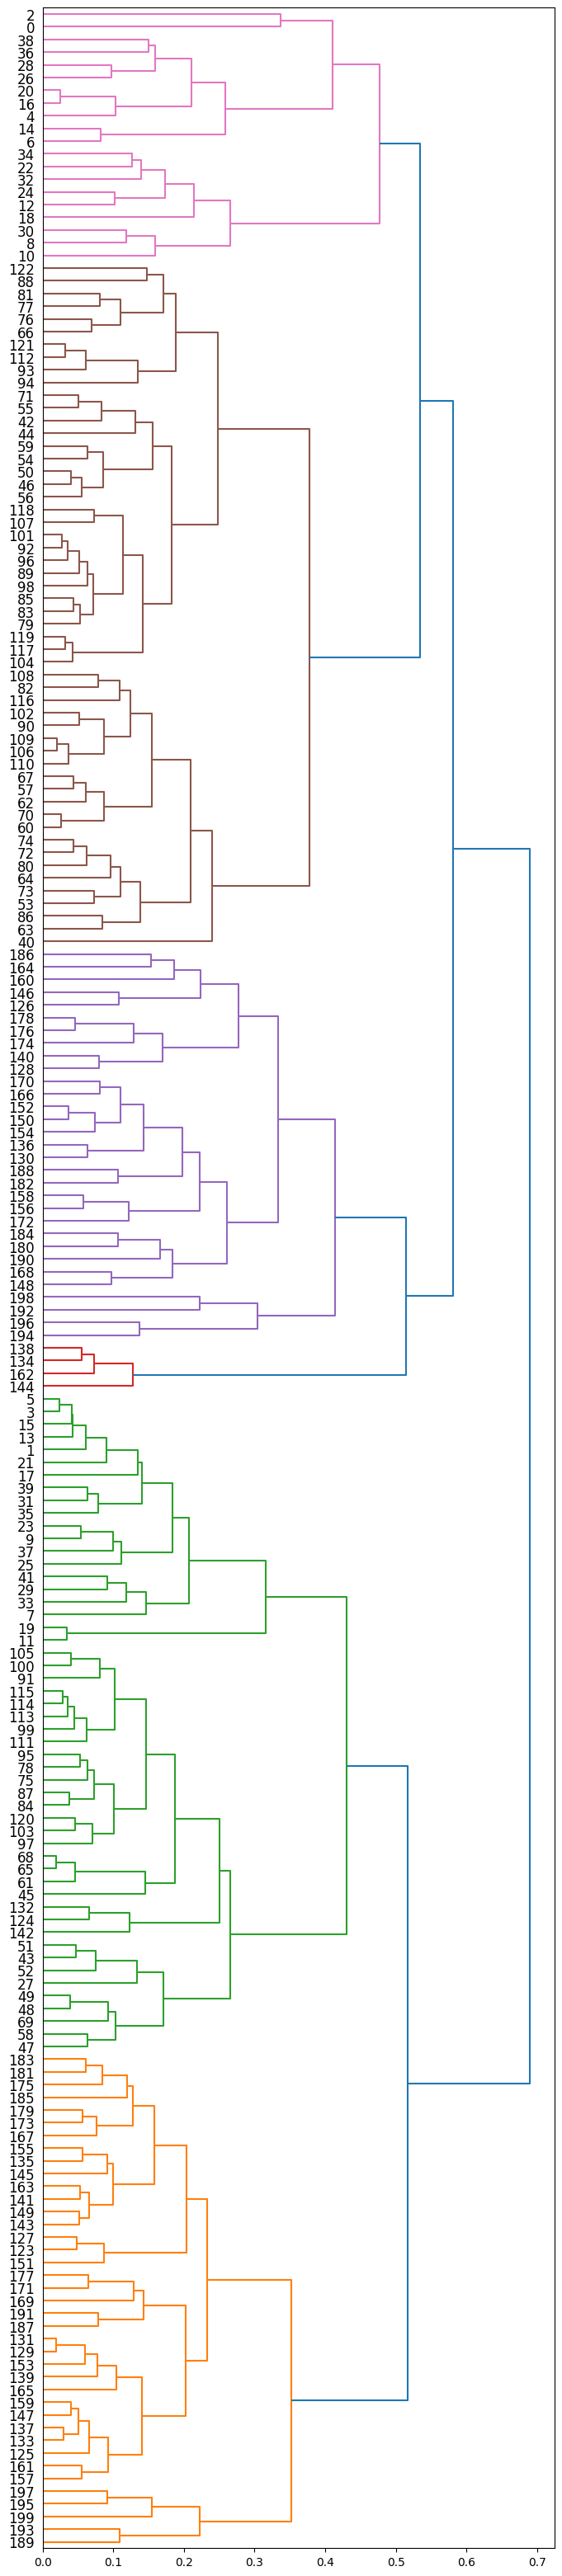

In [203]:
Z = hierarchy.linkage(distancias_vector, 'average')
plt.figure(figsize=(8, 40))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Agrupación basada en densidad (DBSCAN)

La mayoría de las técnicas tradicionales de agrupamiento, como k-means, agrupamiento jerárquico y difuso, se pueden utilizar para agrupar datos sin supervisión.

Sin embargo, cuando se aplican a tareas con grupos de forma arbitraria, o grupos dentro de grupos, las técnicas tradicionales pueden no lograr buenos resultados. Es decir, es posible que los elementos del mismo grupo no compartan suficiente similitud o que el rendimiento sea deficiente.
Además, la agrupación en clústeres basada en la densidad localiza regiones de alta densidad que están separadas entre sí por regiones de baja densidad. La densidad, en este contexto, se define como el número de puntos dentro de un radio específico.

En esta parte, el enfoque principal será manipular los datos y las propiedades de DBSCAN y observar el agrupamiento resultante.

### Modelado
DBSCAN significa Density-Based Spatial Clustering of Applications with Noise (Agrupación espacial de aplicaciones con ruido basada en la densidad). Esta técnica es uno de los algoritmos de agrupamiento más comunes que funciona en función de la densidad del objeto.
La idea general es que si un punto en particular pertenece a un grupo, debería estar cerca de muchos otros puntos en ese grupo.

Funciona en base a dos parámetros: Epsilon y Puntos Mínimos
__Epsilon__ determina un radio específico que, si incluye una cantidad suficiente de puntos dentro, lo llamamos área densa
__minimumSamples__ determina la cantidad mínima de puntos de datos que queremos en un vecindario para definir un clúster.

In [204]:
X_dbscan = X.copy()

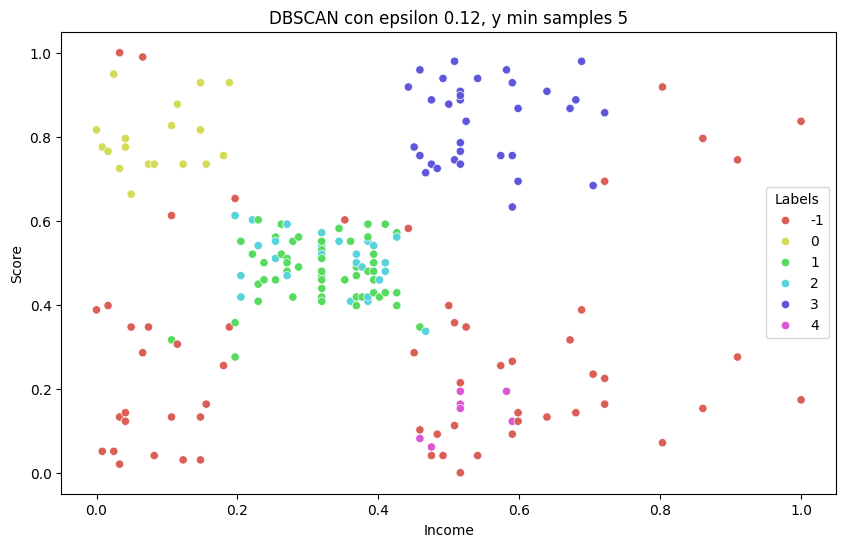

In [205]:
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.12, min_samples=5).fit(X_dbscan)

X_dbscan['Labels'] = db.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x= X_dbscan['Income'], y = X_dbscan['Score'], hue=X_dbscan['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title(f'DBSCAN con epsilon {db.eps}, y min samples {db.min_samples}')
plt.show()

In [206]:
X_dbscan["Labels"].value_counts()

,count
Labels,
-1,60
1,53
3,34
2,28
0,18
4,7


Como podemos ver, DBSCAN no funciona muy bien porque la densidad de nuestros datos no es tan fuerte. La etiqueta -1 significa valores atípicos, por lo que la mayoría aparecerá como valores atípicos. Es posible que nos hayamos desempeñado mejor si hubiéramos tenido datos más grandes.


## Algoritmo Mean Shift
(Algoritmo de desplazamiento medio)

Este algoritmo es útil en situaciones en las que no se conoce a priori el número de grupos que se quieren encontrar y es necesario descubrirlos a partir de los datos.

El algoritmo Mean Shift se basa en la idea de que los puntos de datos en un conjunto de datos pueden agruparse alrededor de los máximos locales de una función de densidad de probabilidad. El algoritmo comienza seleccionando un punto de datos aleatorio y luego se desplaza iterativamente hacia un máximo local de la función de densidad de probabilidad. Este proceso se repite para cada punto de datos hasta que no haya más puntos que se puedan asignar a un máximo local.

El algoritmo establece automáticamente la cantidad de clústeres que se van a formar, en lugar de depender de "sintonizar" los parámetros, lo cual limita el tamaño de la región a lo largo de la cual hay que buscar.

El parámetro más importante del algoritmo Mean Shift es el ancho del kernel, que determina la sensibilidad del algoritmo a la forma de la función de densidad de probabilidad. Un valor de ancho de kernel demasiado grande puede resultar en que varios grupos se agrupen en uno solo, mientras que un valor demasiado pequeño puede generar demasiados grupos.

Este parámetro se puede configurar manualmente, pero se puede estimar utilizando la función `estimate_bandwidth` provista, que se llama si el ancho de banda no está configurado.

In [207]:
X_ms = X.copy()

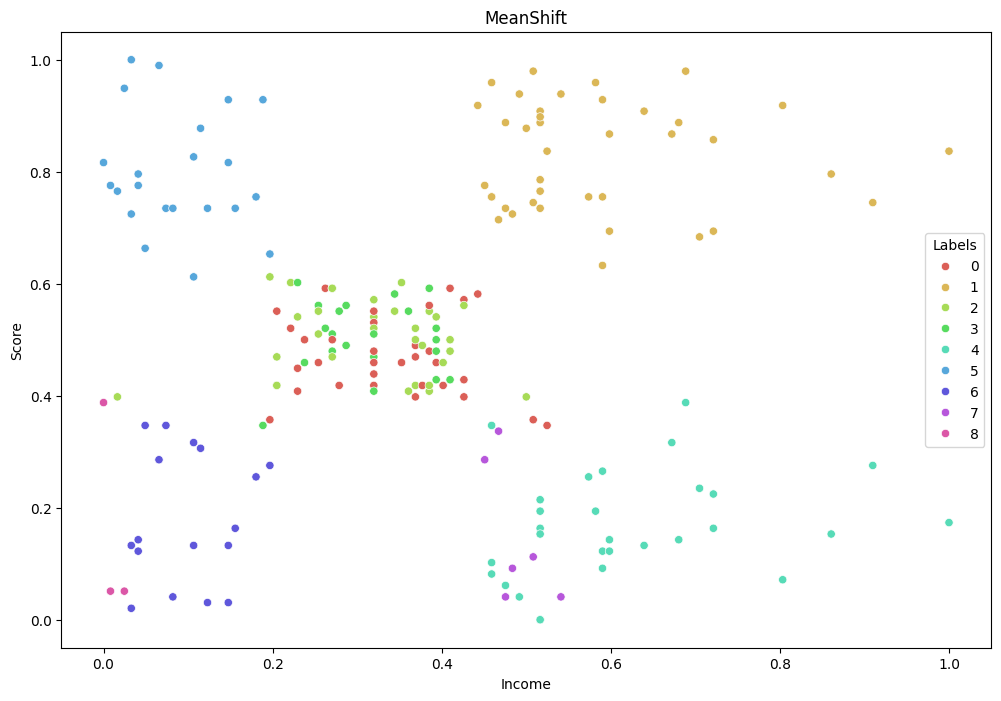

In [209]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X_ms, quantile=0.1)

ms = MeanShift(bandwidth=bandwidth).fit(X_ms)

X_ms['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = X_ms['Income'], y = X_ms['Score'], hue=X_ms['Labels'],
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [210]:
X_ms["Labels"].value_counts()

,count
Labels,
1,39
0,32
2,31
4,29
5,22
3,21
6,17
7,6
8,3


## Visualización conjunta de todos los modelos

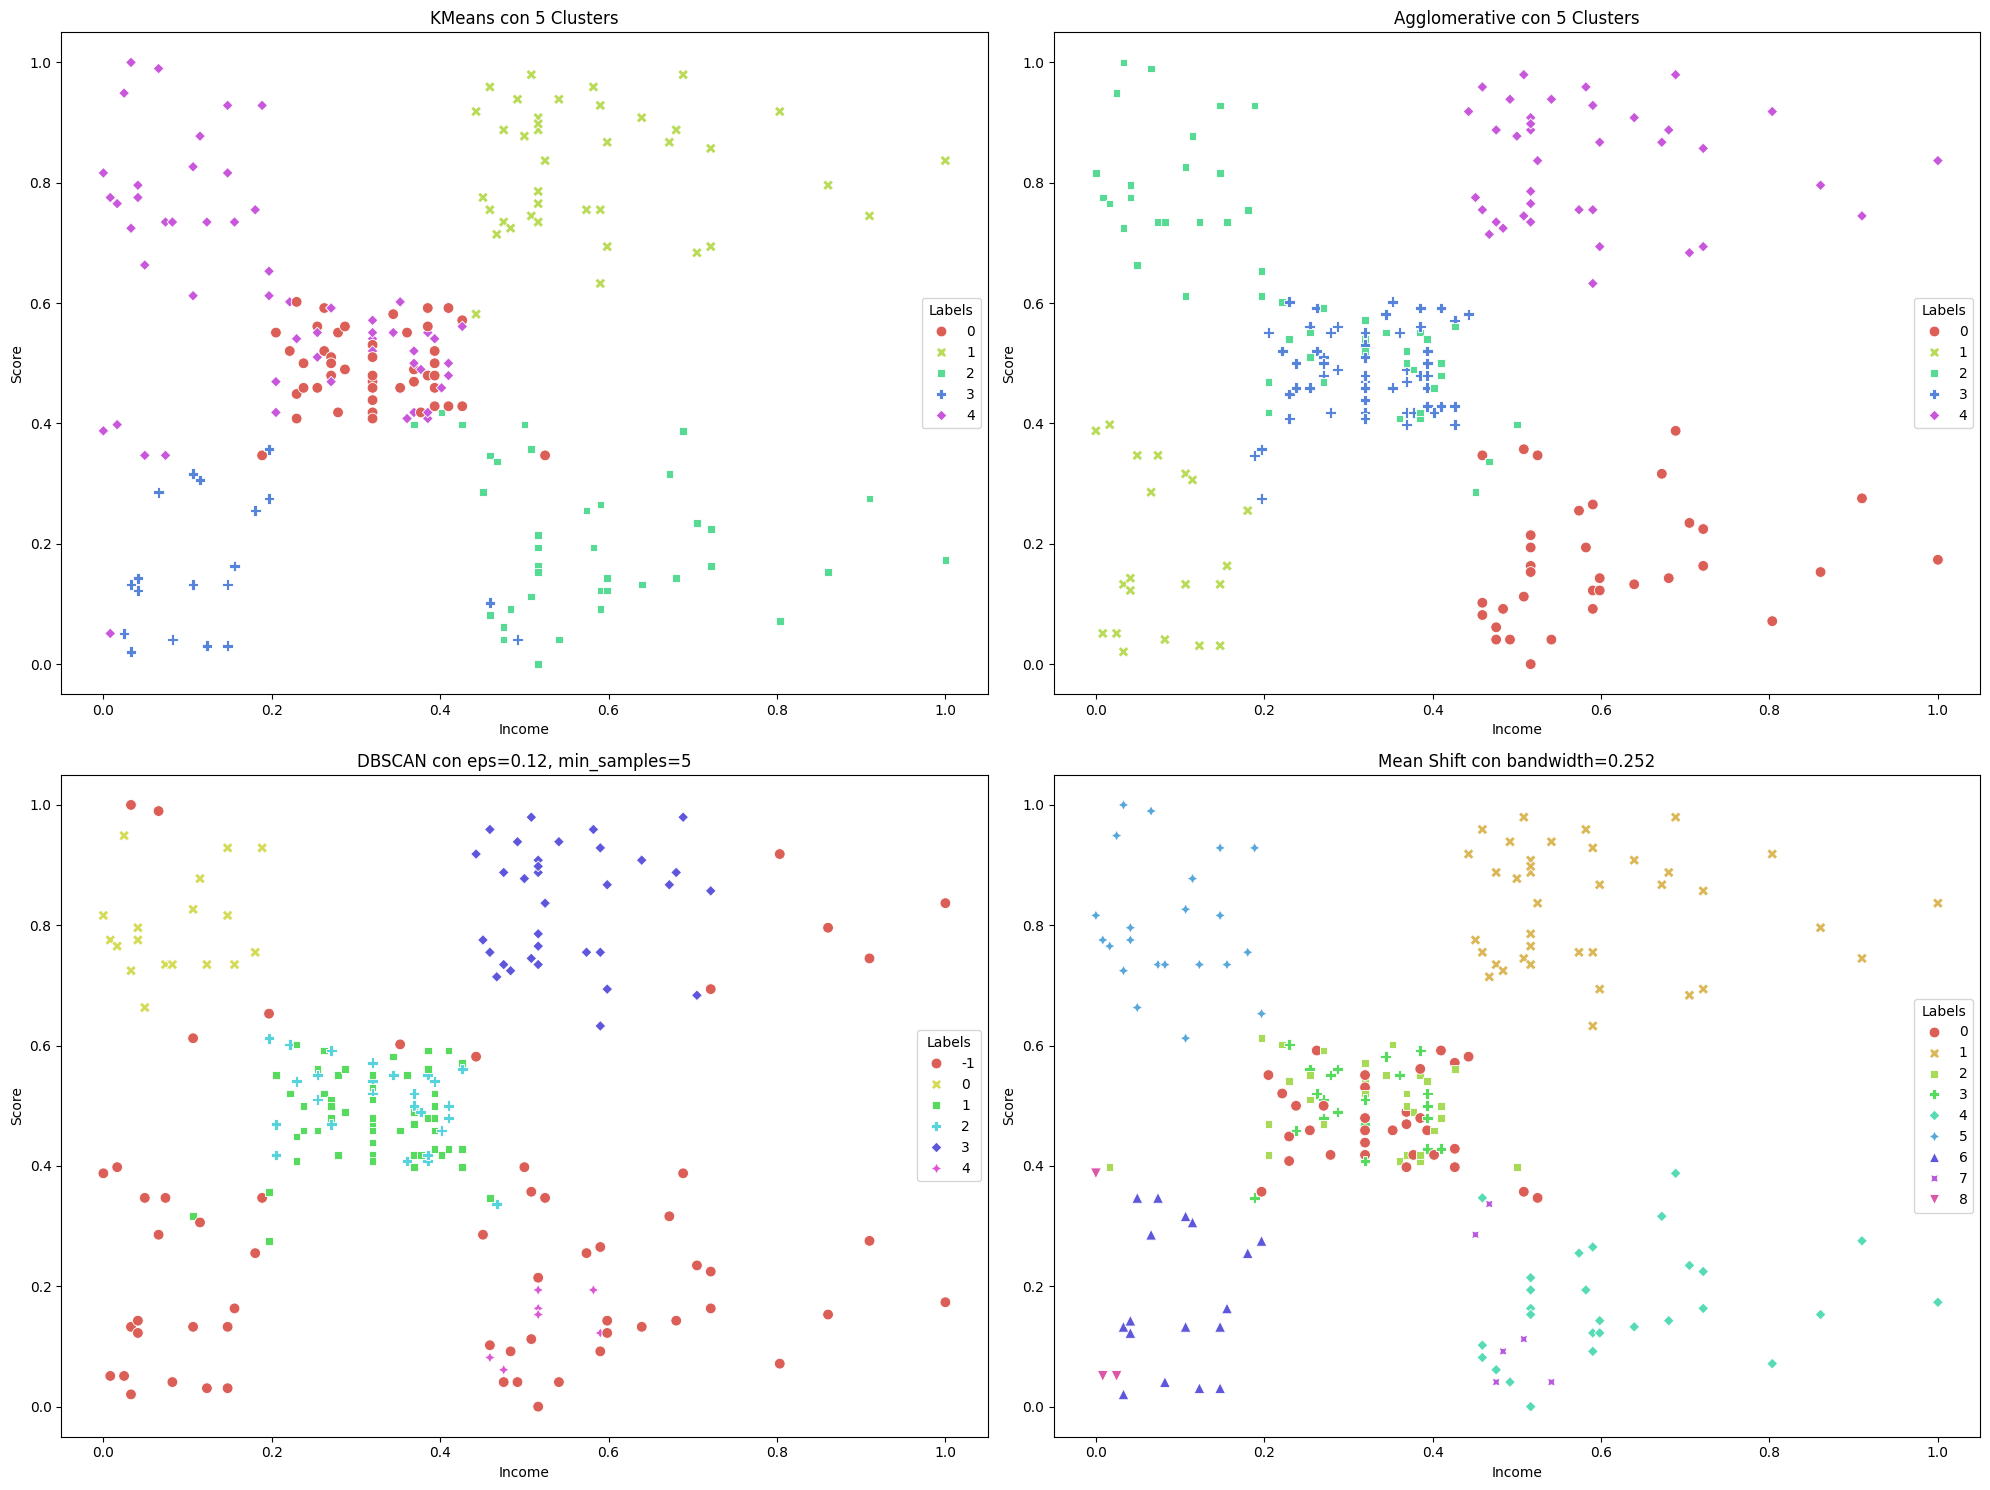

In [211]:
fig = plt.figure(figsize=(20, 15))

##### KMeans #####
ax = fig.add_subplot(221)
sns.scatterplot(
    x=X_kmeans_5['Income'], y=X_kmeans_5['Score'], hue=X_kmeans_5['Labels'],
    style=X_kmeans_5['Labels'], palette=sns.color_palette('hls', X_kmeans_5['Labels'].nunique()),
    s=60, ax=ax
)
ax.set_title('KMeans con 5 Clusters')

##### Agglomerative Clustering #####
ax = fig.add_subplot(222)
sns.scatterplot(
    x=X_aglomerativo['Income'], y=X_aglomerativo['Score'], hue=X_aglomerativo['Labels'],
    style=X_aglomerativo['Labels'], palette=sns.color_palette('hls', X_aglomerativo['Labels'].nunique()),
    s=60, ax=ax
)
ax.set_title('Agglomerative con 5 Clusters')

##### DBSCAN #####
ax = fig.add_subplot(223)
sns.scatterplot(
    x=X_dbscan['Income'], y=X_dbscan['Score'], hue=X_dbscan['Labels'],
    style=X_dbscan['Labels'], palette=sns.color_palette('hls', X_dbscan['Labels'].nunique()),
    s=60, ax=ax
)
ax.set_title(f'DBSCAN con eps={db.eps}, min_samples={db.min_samples}')

##### Mean Shift #####
ax = fig.add_subplot(224)
sns.scatterplot(
    x=X_ms['Income'], y=X_ms['Score'], hue=X_ms['Labels'],
    style=X_ms['Labels'], palette=sns.color_palette('hls', X_ms['Labels'].nunique()),
    s=60, ax=ax
)
ax.set_title(f'Mean Shift con bandwidth={bandwidth:.3f}')

plt.tight_layout()
plt.show()